Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from joblib import dump, load
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# grid search hyperparameters for ridge regression
from sklearn.model_selection import GridSearchCV
# load the dataset

df = pd.read_csv('/content/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = df.drop('sales',axis=1)
X=X.values
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Linearmodel = LinearRegression()

Linearmodel.fit(X_train,y_train)

predictions = Linearmodel.predict(X_test)

campaign = [[149,22,12]]

MAE = mean_absolute_error(y_test,predictions)

MSE = mean_squared_error(y_test,predictions)

RMSE = np.sqrt(MSE)

print("Linear MAE :",MAE,"Linear MSE :",MSE,"Linear RMSE :",RMSE)
print("LinearModel prediction :",Linearmodel.predict(campaign))

Linear MAE : 1.233375952285021 Linear MSE : 3.6913948456986083 Linear RMSE : 1.9213003007595164
LinearModel prediction : [13.85191279]


Ridge Regression

In [ ]:


from sklearn.linear_model import RidgeCV
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1]

ridge_cv=RidgeCV(alphas=alphas, store_cv_values=True)
ridge_mod = ridge_cv.fit(X_train,y_train)
#print(ridge_mod.alpha_)

#print(np.mean(ridge_mod.cv_values_, axis=0))

ypred = ridge_mod.predict(X_test)
score = ridge_mod.score(X_test,y_test)
mse = mean_squared_error(y_test,ypred)
mae=mean_absolute_error(y_test,ypred)
rmse=np.sqrt(mse)

print("Ridgecv score :",score,"Ridgecv MAE :",mae,"Ridgecv MSE :",mse,"Ridgecv RMSE :",rmse)
print("RidgeCv prediction :",ridge_mod.predict(campaign))


Ridgecv score : 0.8649054724144403 Ridgecv MAE : 1.2333610272261988 Ridgecv MSE : 3.6912969786300485 Ridgecv RMSE : 1.9212748316235364
RidgeCv prediction : [13.85189684]


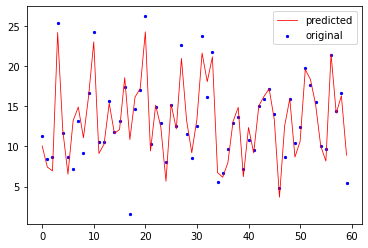

In [ ]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

Poly regression


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

dataset = pd.read_csv('/content/Advertising.csv')


# splitting the data set into the value that needs to be predicted and the other values

X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values


# getting an array with the degree and its corresponding rmse so we could plot them and see the error complexity (polynomial degree)

deg = 1
errDegree = []
errRmse = []
errRmse2 = []
for i in range(10):
 poly = PolynomialFeatures(degree= deg, include_bias=False)
 poly_features = poly.fit_transform(X)

#splitting the data into train and test

 X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# fitting the data into the model

 poly_reg_model = LinearRegression()
 poly_reg_model.fit(X_train, y_train)


 poly_reg_y_predicted = poly_reg_model.predict(X_test)
 poly_reg_y_train = poly_reg_model.predict(X_train)

 poly_reg_rmse_test = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
 poly_reg_rmse_train = np.sqrt(mean_squared_error(y_train, poly_reg_y_train))

#creating the array taht contains the rmse errors for both training and testing

 errDegree.append(deg)
 errRmse.append(poly_reg_rmse_test)
 errRmse2.append(poly_reg_rmse_train)
 deg = deg + 1




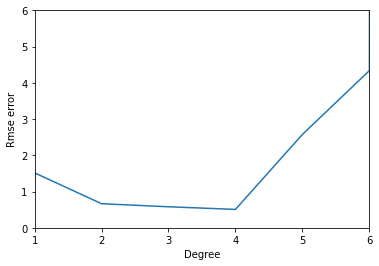

after the sixth degree the error starts to exponentially grow and the lower values wont appear accuratly


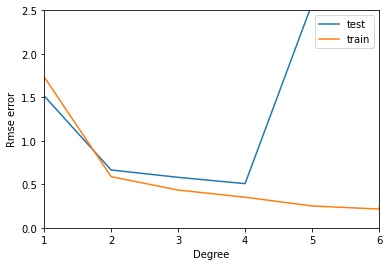

In [ ]:
# plotting only the test results


plt.plot(errDegree,errRmse)
plt.ylim([0,6])
plt.xlim([1,6])
plt.xlabel('Degree')
plt.ylabel('Rmse error')
plt.show()

print("after the sixth degree the error starts to exponentially grow and the lower values wont appear accuratly")

#ploting both the test and the train

plt.plot(errDegree ,errRmse , label = "test" )

plt.plot(errDegree , errRmse2 , label = "train")

plt.xlabel('Degree')
plt.ylabel('Rmse error')

plt.ylim([0,2.5])
plt.xlim([1,6])
plt.legend()
plt.show()

**i found earlier that degree 4 works best with the testing and has the least error thats why i choose it to be the optomal degree and made a model for it**

In [ ]:
# i found from the earlier graph that the degree 4 is the best degree so i created a model with degree 4

poly = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly.fit_transform(X)

#splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# fitting the data into the model

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)


poly_reg_y_predicted = poly_reg_model.predict(X_test)

# Saving the optimal polynomial regression model with degree of 4 in a file

filename = "optimal_polyreg_model.joblib"
joblib.dump(poly_reg_model, filename)
optimal_polyreg_model = joblib.load(filename)

#getting the mse / mae / rmse errors for the polynomial regression


poly_mean_squared_error = mean_squared_error(y_test, poly_reg_y_predicted)
poly_mean_absolute_error = mean_absolute_error(y_test, poly_reg_y_predicted)
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))

print("MAE :", poly_mean_absolute_error ,"MSE :"  , poly_mean_squared_error ,"RMSE :", poly_reg_rmse)

# predicting the wanted values in the assignment using the polynomial regression

campaign = [[149,22,12]]

print("Optimal_Polynomial prediction :",poly_reg_model.predict(poly.fit_transform(campaign)))


MAE : 0.39260937457464185 MSE : 0.2578347029673635 RMSE : 0.5077742637898888
Optimal_Polynomial prediction : [14.36699551]


In [ ]:

#comparaison
print("Linear MAE :",MAE,"Linear MSE :",MSE,"Linear RMSE :",RMSE)
print("Ridgecv score :",score,"Ridgecv MAE :",mae,"Ridgecv MSE :",mse,"Ridgecv RMSE :",rmse)
print("Poly MAE :", poly_mean_absolute_error ,"Poly MSE :"  , poly_mean_squared_error ,"Poly RMSE :", poly_reg_rmse)
print("LinearModel prediction :",Linearmodel.predict(campaign))
print("RidgeCv prediction :",ridge_mod.predict(campaign))
print("Optimal_Polynomial prediction :",poly_reg_model.predict(poly.fit_transform(campaign)))


Linear MAE : 1.233375952285021 Linear MSE : 3.6913948456986083 Linear RMSE : 1.9213003007595164
Ridgecv score : 0.8649054724144403 Ridgecv MAE : 1.2333610272261988 Ridgecv MSE : 3.6912969786300485 Ridgecv RMSE : 1.9212748316235364
Poly MAE : 0.39260937457464185 Poly MSE : 0.2578347029673635 Poly RMSE : 0.5077742637898888
LinearModel prediction : [13.85191279]
RidgeCv prediction : [13.85189684]
Optimal_Polynomial prediction : [14.36699551]
